# GAN for Cybersecurity

In [2]:
# Import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn

# Dataset pre-processing

In [3]:
# Import dataset
path_training = "Training and Testing Sets/UNSW_NB15_training-set.csv"
path_testing = "Training and Testing Sets/UNSW_NB15_testing-set.csv"
df_train = pd.read_csv(path_training)
df_test = pd.read_csv(path_testing)

print("Training set shape:", df_train.shape)
df_train.head()

Training set shape: (175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
print("Testing set shape:", df_test.shape)
df_test.head()

Testing set shape: (82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
# Convert categorical features to float
categorical_features = ['proto', 'service', 'state', 'attack_cat']
for feature in categorical_features:
    df_train[feature] = df_train[feature].astype('category').cat.codes
    df_test[feature] = df_test[feature].astype('category').cat.codes

# df shape
print("Training set shape after encoding:", df_train.shape)
print("Testing set shape after encoding:", df_test.shape)

Training set shape after encoding: (175341, 45)
Testing set shape after encoding: (82332, 45)


# Visualize Dataset repartition

Text(0.5, 1.0, 'Repartition of Normal and Anomalous Data in Training Set')

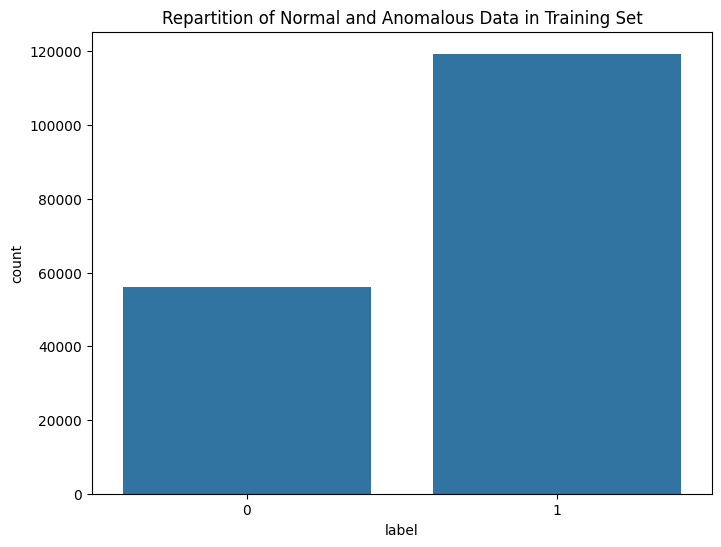

In [6]:
# Repartition of the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train)
plt.title('Repartition of Normal and Anomalous Data in Training Set')

In [7]:
# print number of features and min and max values
print("Number of features:", df_train.shape[1])
feature_stats = []
for feature in df_train.columns:
    min_val = df_train[feature].min()
    max_val = df_train[feature].max()
    mean_val = df_train[feature].mean()
    feature_stats.append({'Feature': feature, 'Min': min_val, 'Max': max_val, 'Mean': mean_val})

feature_stats_df = pd.DataFrame(feature_stats)
print(feature_stats_df)


Number of features: 45
              Feature   Min           Max          Mean
0                  id   1.0  1.753410e+05  8.767100e+04
1                 dur   0.0  5.999999e+01  1.359389e+00
2               proto   0.0  1.320000e+02  1.096067e+02
3             service   0.0  1.200000e+01  1.618920e+00
4               state   0.0  8.000000e+00  2.355176e+00
5               spkts   1.0  9.616000e+03  2.029866e+01
6               dpkts   0.0  1.097400e+04  1.896959e+01
7              sbytes  28.0  1.296523e+07  8.844844e+03
8              dbytes   0.0  1.465555e+07  1.492892e+04
9                rate   0.0  1.000000e+06  9.540619e+04
10               sttl   0.0  2.550000e+02  1.795470e+02
11               dttl   0.0  2.540000e+02  7.960957e+01
12              sload   0.0  5.988000e+09  7.345403e+07
13              dload   0.0  2.242273e+07  6.712056e+05
14              sloss   0.0  4.803000e+03  4.953000e+00
15              dloss   0.0  5.484000e+03  6.948010e+00
16             sinpkt   0

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Directement MinMaxScaler en [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))

df_train_scaled = pd.DataFrame(
    scaler.fit_transform(df_train.drop(columns=['label'])), 
    columns=df_train.columns.drop('label')
)
df_train_scaled['label'] = df_train['label'].values

df_test_scaled = pd.DataFrame(
    scaler.transform(df_test.drop(columns=['label'])), 
    columns=df_test.columns.drop('label')
)
df_test_scaled['label'] = df_test['label'].values

# Vérification
print("✅ Plages après MinMaxScaler:")
print(f"Train - Min: {df_train_scaled.drop(columns=['label']).min().min():.4f}, Max: {df_train_scaled.drop(columns=['label']).max().max():.4f}")

print("\nTraining set after normalization:")
print(df_train_scaled.head())

✅ Plages après MinMaxScaler:
Train - Min: -1.0000, Max: 1.0000

Training set after normalization:
         id       dur     proto  service  state     spkts     dpkts    sbytes  \
0 -1.000000 -0.995951  0.712121     -1.0   -0.5 -0.998960 -0.999271 -0.999965   
1 -0.999989 -0.978337  0.712121     -1.0   -0.5 -0.997296 -0.993075 -0.999891   
2 -0.999977 -0.945896  0.712121     -1.0   -0.5 -0.998544 -0.997084 -0.999948   
3 -0.999966 -0.943945  0.712121     -0.5   -0.5 -0.997712 -0.997813 -0.999907   
4 -0.999954 -0.985018  0.712121     -1.0   -0.5 -0.998128 -0.998907 -0.999922   

     dbytes      rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0 -0.999977 -0.999852  ...              -1.0        -1.00000          -1.0   
1 -0.994266 -0.999843  ...              -1.0        -0.96875          -1.0   
2 -0.998201 -0.999972  ...              -1.0        -0.93750          -1.0   
3 -0.999895 -0.999973  ...              -1.0        -0.93750          -0.5   
4 -0.999963 -0.999933  ..

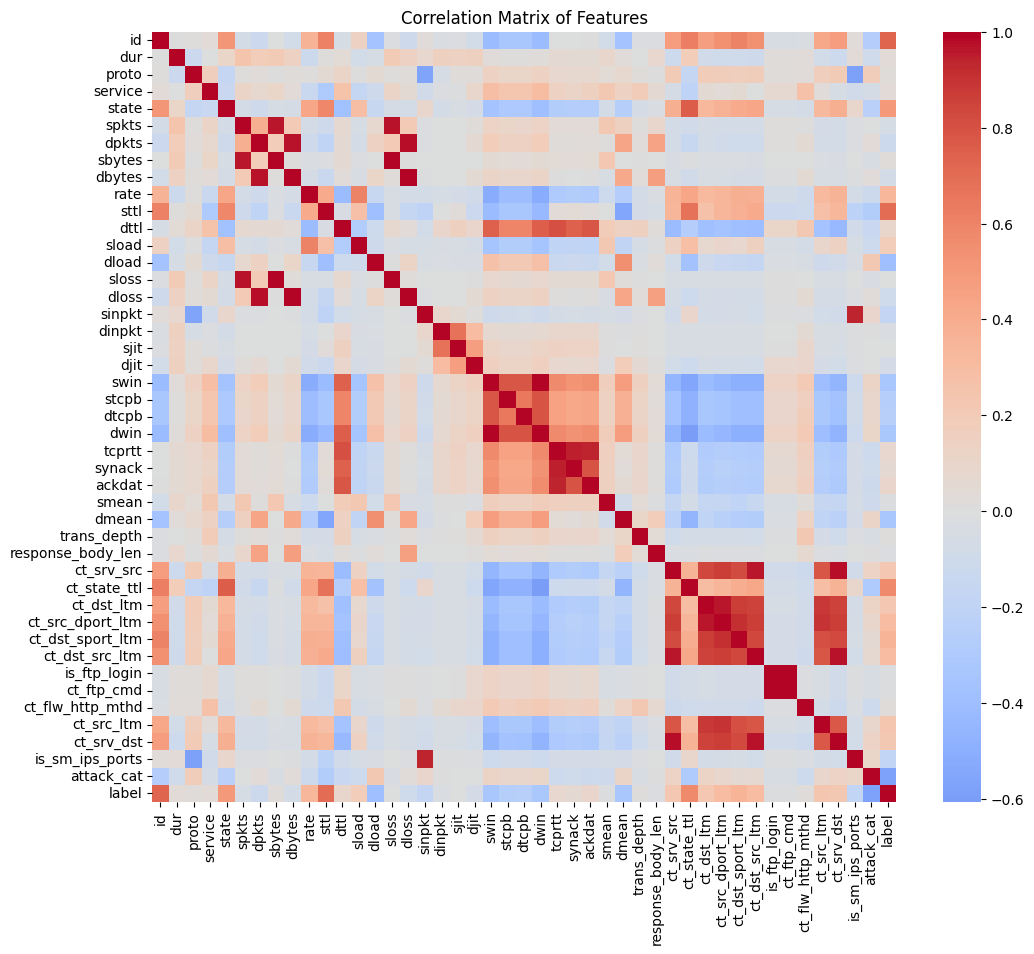

In [9]:
# correlation matrix for feature selection
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

In [27]:
# Determine important features
# Based on correlation with the label, we can select features with high absolute correlation values
important_features = corr_matrix['label'].abs().sort_values(ascending=False)
print("Important features based on correlation with label:\n", important_features)

# Select top N features (excluding the label itself)
N = 20
top_features = important_features.index[1:N+1].tolist()
print("Top {} features selected for training:\n".format(N), top_features)

# Prepare data for training
X_train = df_train[top_features]
y_train = df_train['label']
X_test = df_test[top_features]
y_test = df_test['label']
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X_train after scaling shape:", X_train.shape)
print("X_test after scaling shape:", X_test.shape)

Important features based on correlation with label:
 label                1.000000
id                   0.727173
sttl                 0.692741
attack_cat           0.580908
ct_state_ttl         0.577704
state                0.497685
dload                0.393739
ct_dst_sport_ltm     0.357213
dmean                0.341806
rate                 0.337979
swin                 0.333633
dwin                 0.319626
ct_src_dport_ltm     0.305579
ct_dst_src_ltm       0.303855
stcpb                0.255006
dtcpb                0.250340
ct_src_ltm           0.238225
ct_dst_ltm           0.229887
ct_srv_src           0.229044
ct_srv_dst           0.228046
is_sm_ips_ports      0.184679
sload                0.182870
sinpkt               0.176110
dpkts                0.118591
ackdat               0.097364
dttl                 0.095049
dloss                0.094685
tcprtt               0.081584
dbytes               0.076871
djit                 0.060870
synack               0.058299
spkts            

# PREPARE THE GAN

In [28]:
# --- CREATE A STABLE GAN MODEL FOR TABULAR DATA ---

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

latent_dim = 32
input_dim = X_train.shape[1]

def build_generator(latent_dim, output_dim):
    model = models.Sequential([
        layers.Input(shape=(latent_dim,)),  # ✅ Explicit input layer
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(output_dim, activation='tanh')  # or 'linear' depending on your data
    ])
    return model

def build_discriminator(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),  # ✅ Explicit input layer
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


# =========================================
# 3️⃣ COMPILE MODELS
# =========================================
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)

# Compile discriminator
discriminator.compile(
    optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Freeze D when training G
discriminator.trainable = False

# Build full GAN
gan_input = layers.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = models.Model(gan_input, gan_output)
gan.compile(
    optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy'
)

# =========================================
# 4️⃣ SUMMARIES
# =========================================
print("✅ Generator Summary:")
generator.summary()
print("\n✅ Discriminator Summary:")
discriminator.summary()


✅ Generator Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,924 (171.58 KB)

 Trainable params: 43,156 (168.58 KB)

 Non-trainable params: 768 (3.00 KB)


✅ Discriminator Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,401 (150.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 38,401 (150.00 KB)

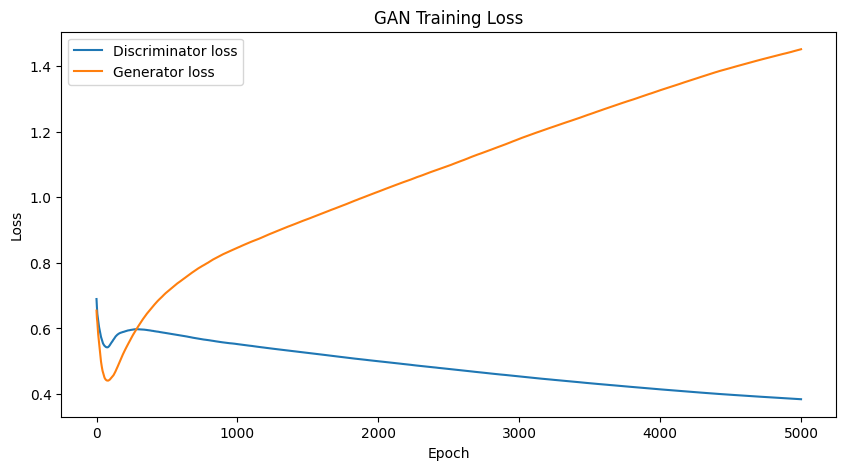


--- Generated samples at epoch 5000 ---


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,0.717971,0.814773,-1.000000,0.407897,0.187322,-0.314066,-0.225591,-0.379397,0.511366,-0.445477,-0.322201,-0.303084,-0.136403,-0.488452,-0.579512,0.285748,-0.304481,-0.262834,-0.345310,-0.191152
1,-0.972787,0.794854,0.999986,0.855034,0.843333,-0.327445,-0.689747,-0.467359,-0.225446,-0.999201,-0.988423,-0.574239,-0.365011,-0.790216,-0.790150,-0.799050,-0.626635,-0.490052,-0.433821,-0.141837
2,-0.140103,0.784660,0.144948,0.814117,0.846778,-0.304172,-0.331509,-0.483339,0.392912,-1.000000,-0.999889,-0.364728,-0.239768,-0.718282,-0.741237,-0.818534,-0.407199,-0.292128,-0.213451,-0.123056
3,-0.172479,0.716977,0.997345,-0.281161,-0.347017,-0.243169,-0.565111,-0.319027,-0.519978,0.999996,0.999641,-0.495633,-0.582733,0.663423,-0.115387,-0.392698,-0.600250,-0.694989,-0.710203,-0.119099
4,0.898676,-0.711305,1.000000,-0.455081,-0.316188,-0.156056,-0.541423,0.263178,-0.447723,1.000000,1.000000,-0.535514,-0.367073,0.999448,0.642318,-0.556037,-0.622545,-0.574648,-0.620468,-0.066915


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

def train_gan_plot_samples(gan, generator, discriminator, X_train, latent_dim,
                           epochs=10000, batch_size=128, plot_interval=100, sample_interval=500, num_samples=5):
    """
    Train a GAN with real-time loss plots and periodic generated sample inspection.
    
    Parameters:
    - plot_interval: epochs between loss plot updates
    - sample_interval: epochs between sample data visualization
    - num_samples: how many generated samples to display
    """
    X_train = X_train.astype('float32')  # ensure numpy array
    half_batch = batch_size // 2
    
    d_losses, g_losses = [], []
    
    for epoch in range(1, epochs + 1):
        # ---------------------
        # Train Discriminator
        # ---------------------
        discriminator.trainable = True
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_data = X_train[idx]
        noise = np.random.normal(size=(half_batch, latent_dim))
        fake_data = generator(noise, training=False).numpy()
        
        d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((half_batch, 1)))
        d_loss = [0.5 * (d_loss_real[0] + d_loss_fake[0]),
                  0.5 * (d_loss_real[1] + d_loss_fake[1])]
        
        # ---------------------
        # Train Generator
        # ---------------------
        discriminator.trainable = False
        noise = np.random.normal(size=(batch_size, latent_dim))
        valid_y = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_y)
        
        # ---------------------
        # Log losses
        # ---------------------
        d_losses.append(d_loss[0])
        g_losses.append(g_loss)
        
        # ---------------------
        # Print progress
        # ---------------------
        if epoch % 10 == 0:
            print(f"{epoch}/{epochs} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
        
        # ---------------------
        # Plot losses in real time
        # ---------------------
        if epoch % plot_interval == 0 or epoch == 1:
            clear_output(wait=True)
            plt.figure(figsize=(10,5))
            plt.plot(d_losses, label='Discriminator loss')
            plt.plot(g_losses, label='Generator loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('GAN Training Loss')
            plt.legend()
            plt.show()
        
        # ---------------------
        # Generate and show sample data
        # ---------------------
        if epoch % sample_interval == 0 or epoch == 1:
            noise = np.random.normal(size=(num_samples, latent_dim))
            gen_samples = generator(noise, training=False).numpy()
            
            print(f"\n--- Generated samples at epoch {epoch} ---")
            # Convert to pandas DataFrame for nicer display
            df_samples = pd.DataFrame(gen_samples, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
            display(df_samples)
            
    return d_losses, g_losses

d_losses, g_losses = train_gan_plot_samples(
    gan, generator, discriminator,
    X_train, latent_dim,
    epochs=5000,        # smaller for testing
    batch_size=128,
    plot_interval=100,  # update loss plot every 100 epochs
    sample_interval=500,# show samples every 500 epochs
    num_samples=5       # 5 generated rows
)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Generated Data Sample:
               id        sttl  attack_cat  ct_state_ttl     state  \
0  102529.164062   76.607384    3.101867      1.040906  2.013303   
1   66451.289062  211.843109    3.101867      1.863079  2.680569   
2   42468.863281  260.142426    3.101867      2.025822  3.067563   
3   72603.804688  246.094315    3.101867      1.169752  2.123021   
4  131447.062500   76.607277    3.101867      0.832760  2.039071   

           dload  ct_dst_sport_ltm       dmean           rate        swin  \
0 -156247.421875          1.525927  215.489716   -7300.617676  243.207153   
1   81054.570312          3.140879   46.793453   94569.273438   30.992538   
2  -23002.988281          2.686385  -16.268909  211814.500000  -10.742150   
3  -10704.300781          0.769205   71.483040    3940.835449  242.190338   
4 -216855.359375          1.502833  269.066956    1191.398071  243.257996   

         dwin  ct_src_dport_ltm  ct_dst_src_ltm         stcpb    

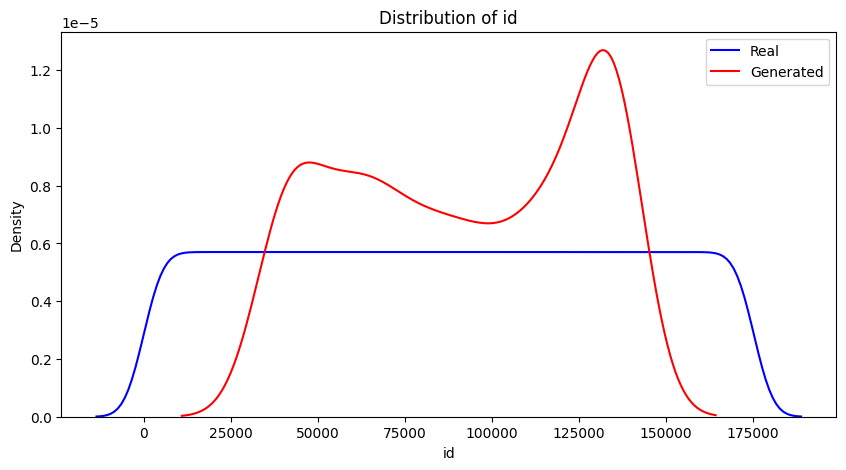

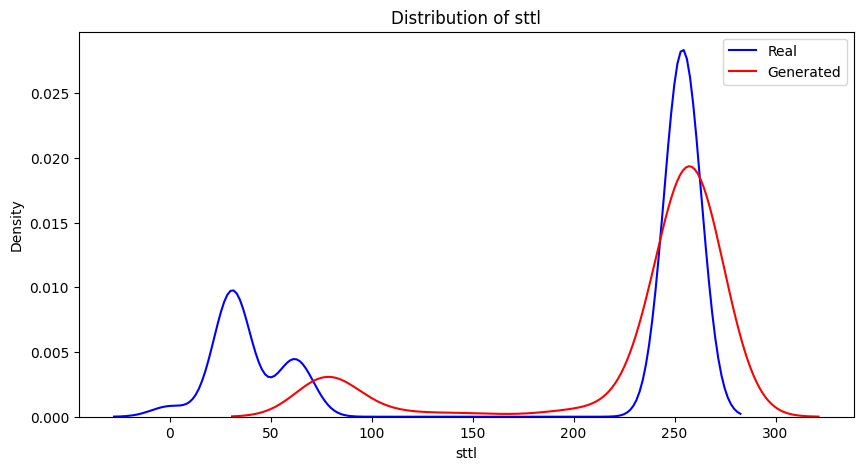

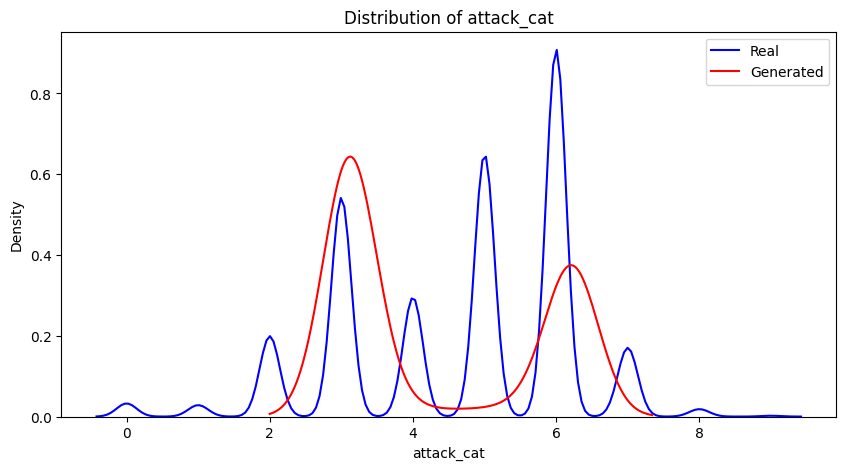

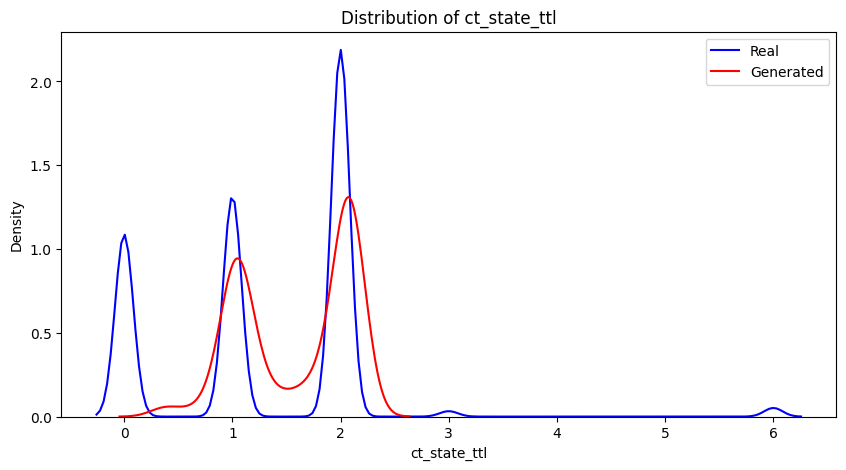

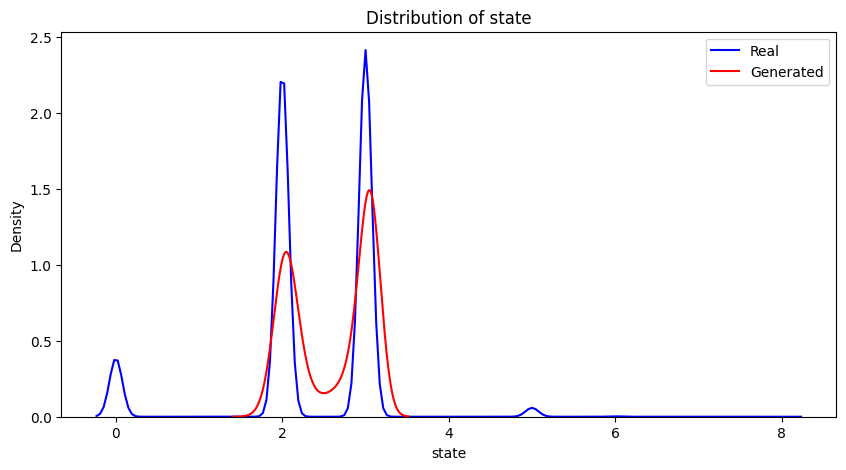

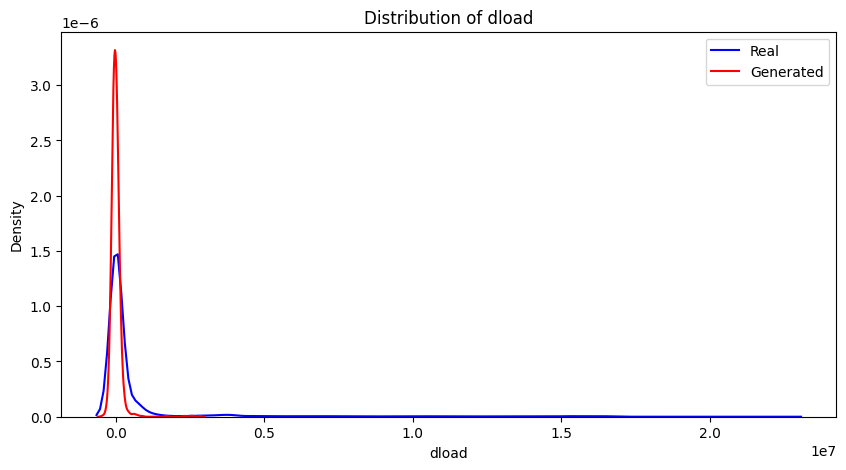

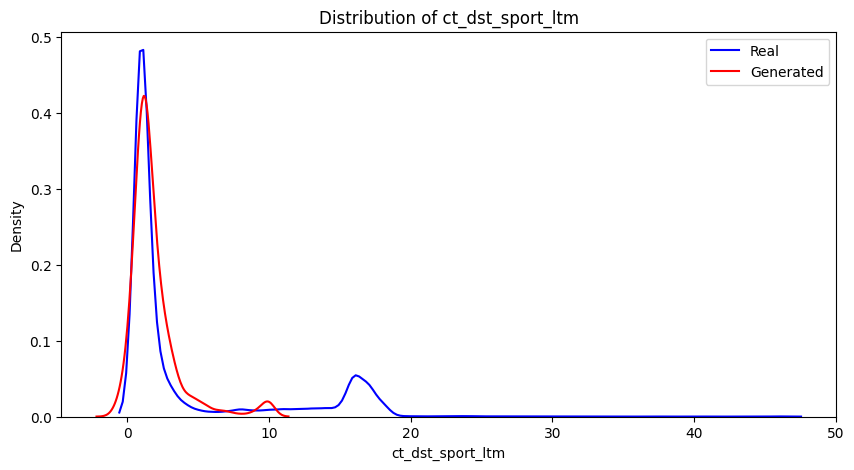

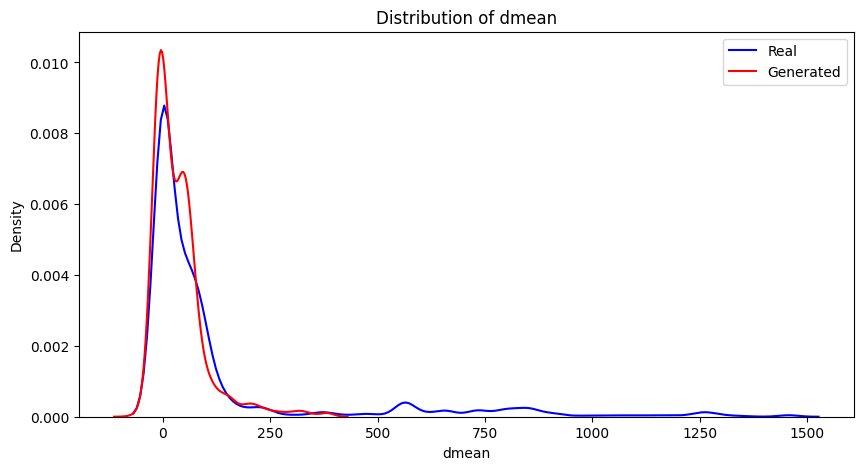

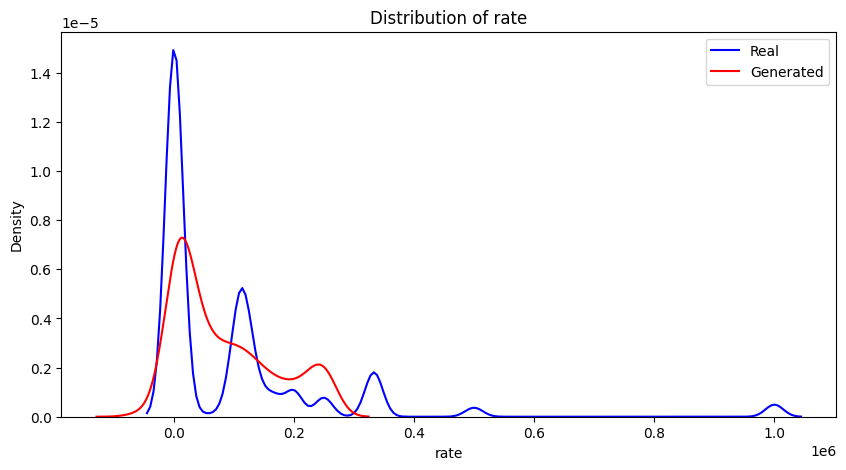

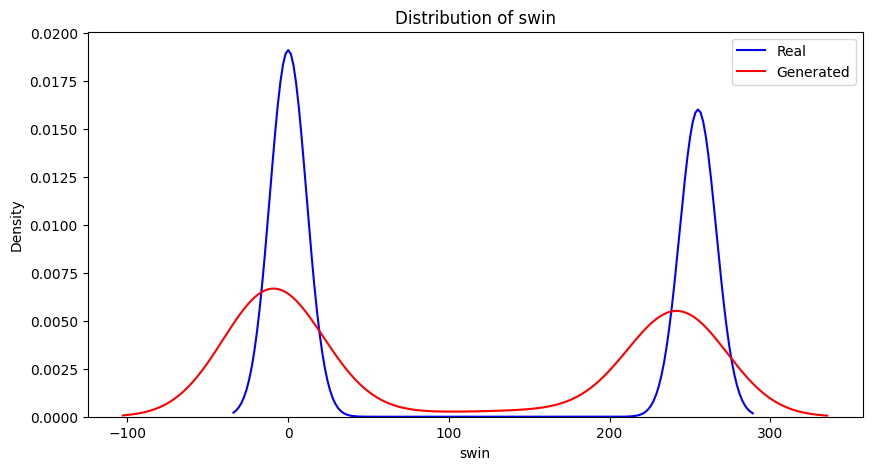

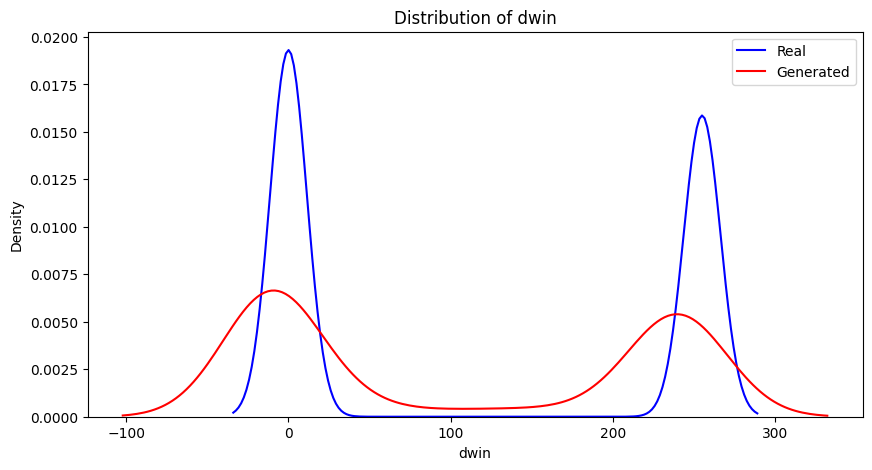

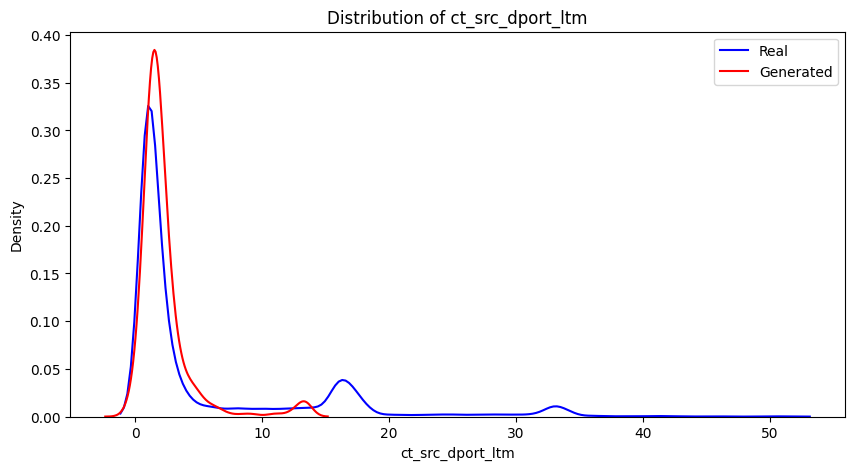

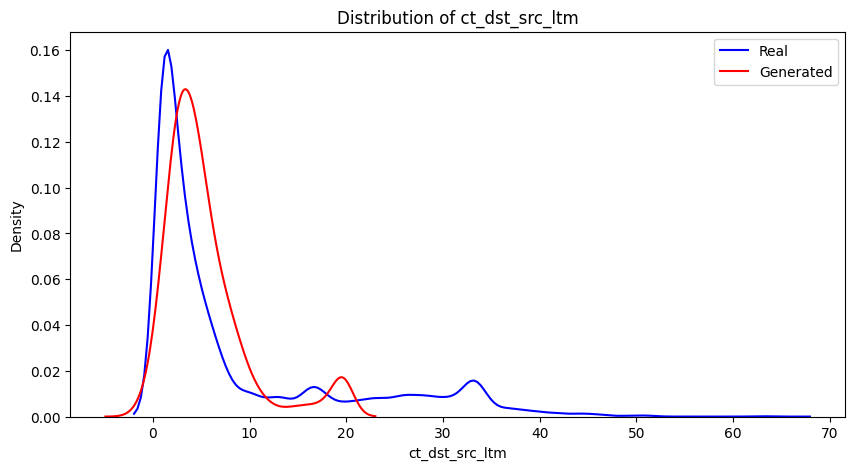

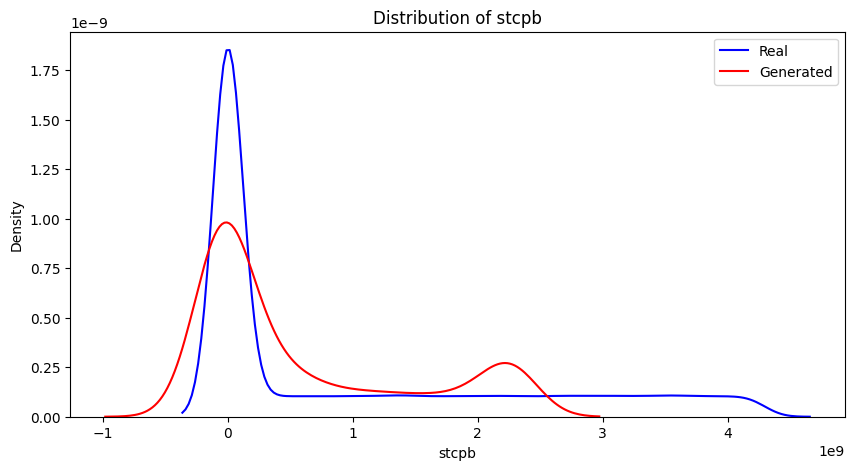

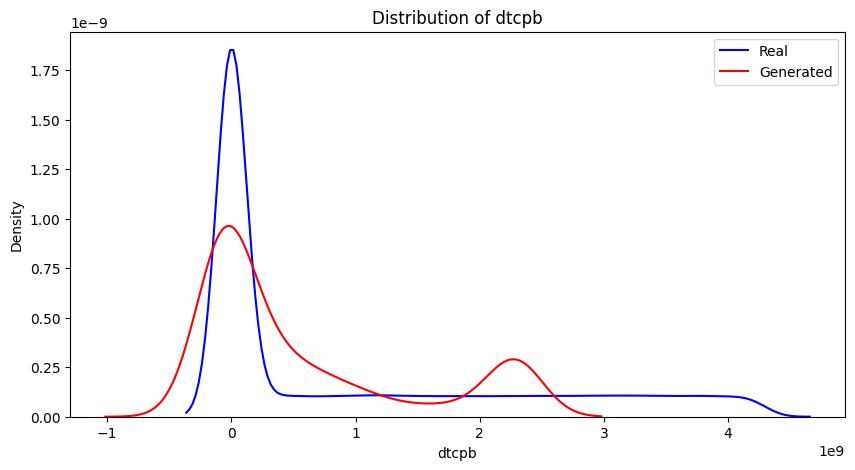

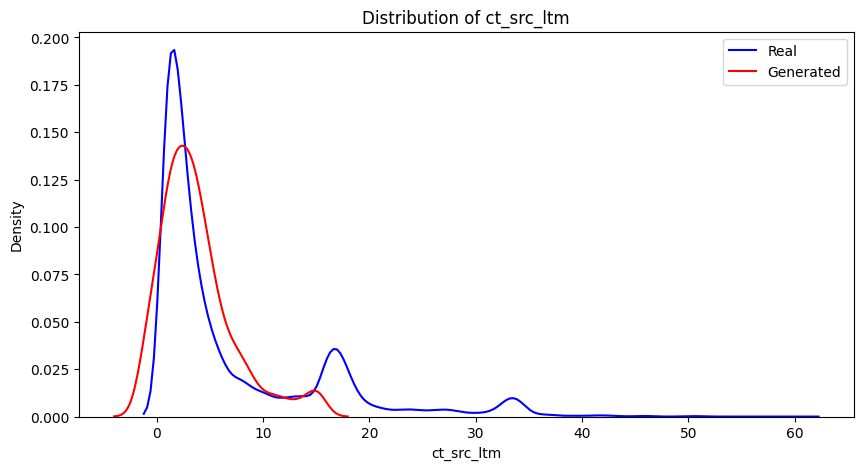

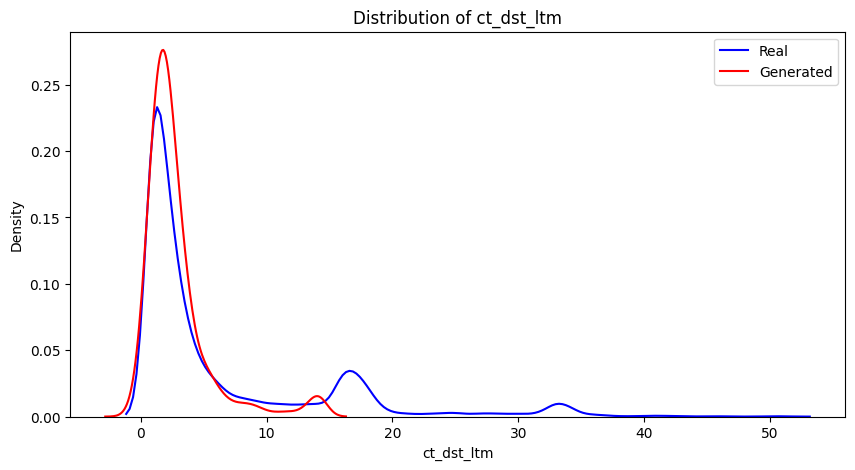

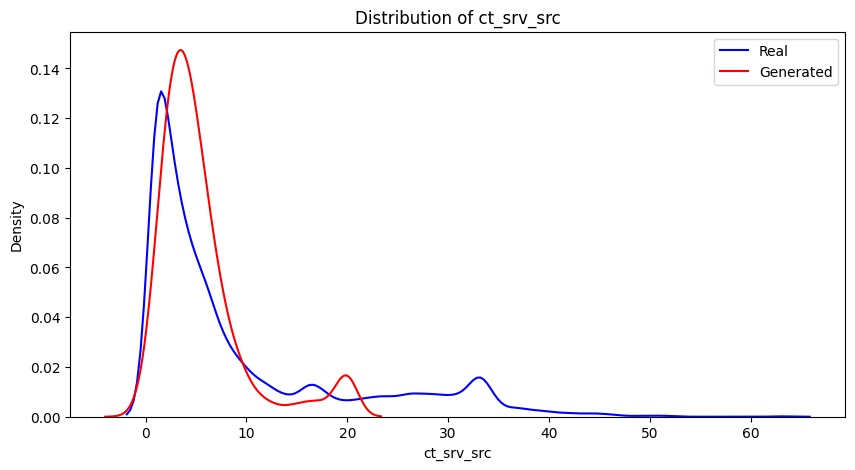

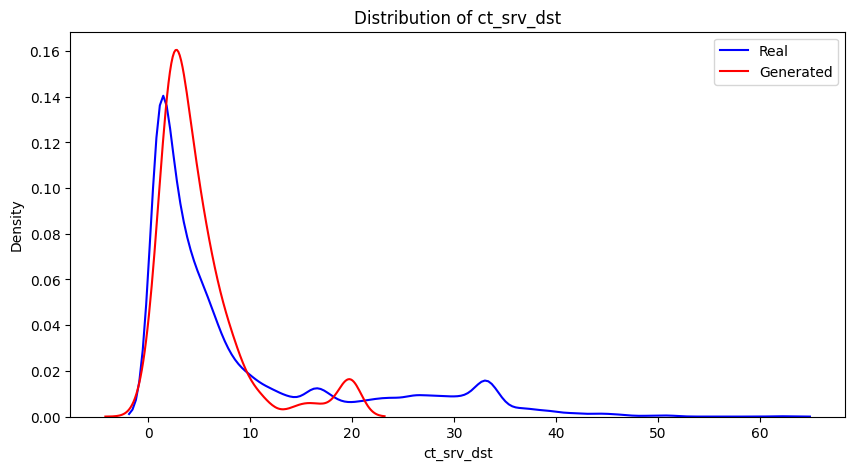

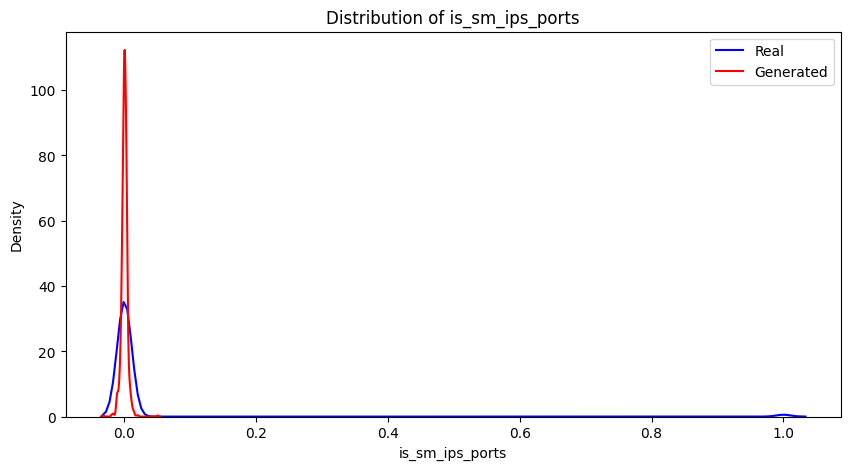

In [30]:
# evaluate the GAN
def evaluate_gan(generator, X_test, latent_dim, n_samples=1000):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    generated_data = generator.predict(noise)
    generated_data = scaler.inverse_transform(generated_data)
    generated_df = pd.DataFrame(generated_data, columns=top_features)
    print("Generated Data Sample:\n", generated_df.head())
    # Compare distributions
    for feature in top_features:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(df_train[feature], label='Real', color='blue')
        sns.kdeplot(generated_df[feature], label='Generated', color='red')
        plt.title(f'Distribution of {feature}')
        plt.legend()
        plt.show()

evaluate_gan(generator, X_test, latent_dim)

# Save the models
generator.save('generator_model.h5')

In [35]:
# generate synthetic data and force 50% phishing / 50% legitimate using discriminator ranking
def generate_synthetic_data(generator, latent_dim, n_samples=1000):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    generated_data = generator.predict(noise)
    generated_data = scaler.inverse_transform(generated_data)
    return pd.DataFrame(generated_data, columns=top_features)

n_samples = 10000
synthetic_data = generate_synthetic_data(generator, latent_dim, n_samples=n_samples)

# get discriminator scores for each generated sample
synthetic_data_scaled = scaler.transform(synthetic_data)
scores = discriminator.predict(synthetic_data_scaled).flatten()

# label top 50% as phishing (1) and the rest as legitimate (0)
k = n_samples // 2
top_k_idx = np.argsort(scores)[-k:]  # indices with highest scores
labels = np.zeros(n_samples, dtype=int)
labels[top_k_idx] = 1
synthetic_data['label'] = labels

# summary
print(f"Synthetic samples: {n_samples} | phishing: {labels.sum()} | legitimate: {n_samples - labels.sum()}")
print("Synthetic Data with Labels Sample:\n", synthetic_data.head())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Synthetic samples: 10000 | phishing: 5000 | legitimate: 5000
Synthetic Data with Labels Sample:
               id        sttl  attack_cat  ct_state_ttl     state  \
0  137783.093750  267.247589    5.909904      2.186898  3.099532   
1   48583.812500  248.132690    6.237427      1.178225  2.137904   
2   37054.640625   76.607277    3.133784      0.365063  2.721948   
3  113597.460938  254.292374    6.226558      1.007055  2.039331   
4  135715.296875  265.300751    3.101867      1.692458  2.823732   

           dload  ct_dst_sport_ltm      dmean           rate        swin  ...  \
0 -132037.859375          3.392705 -24.223881  185887.875000  -10.743325  ...   
1 -131233.171875          0.445688  46.866665   -2978.195801  241.623810  ...   
2  572461.250000          4.415452  61.437077   51798.699219   60.806160  ...   
3  -42937.488281          1.132225  56.685886    7644.476074  243.257996  ...   
4  -752

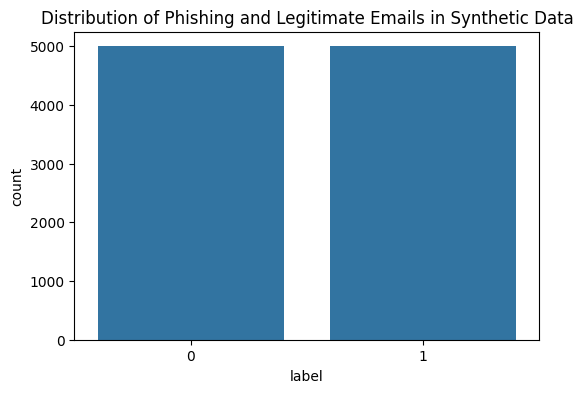

In [36]:
# plot distribution of classes in synthetic data
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=synthetic_data)
plt.title('Distribution of Phishing and Legitimate Emails in Synthetic Data')
plt.show()


In [42]:
# save synthetic data
import os
# save synthetic data (raw + scaled) to disk
out_dir = "synthetic_saves"
os.makedirs(out_dir, exist_ok=True)

# save DataFrame (with labels)
synthetic_data.to_csv(os.path.join(out_dir, "synthetic_data.csv"), index=False)
parquet_path = os.path.join(out_dir, "synthetic_data.parquet")
try:
    # primary attempt: parquet (may require pyarrow or fastparquet)
    synthetic_data.to_parquet(parquet_path, index=False)
    print(f"Saved parquet: {parquet_path}")
except Exception as e:
    # fallback if parquet backend is unavailable or errors (e.g. ArrowKeyError)
    print(f"Parquet save failed: {e!s}. Falling back to pickle and gzipped CSV.")
    synthetic_data.to_pickle(os.path.join(out_dir, "synthetic_data.pkl"))
    synthetic_data.to_csv(os.path.join(out_dir, "synthetic_data.csv.gz"), index=False, compression='gzip')
    print(f"Saved pickle and gzipped CSV to '{out_dir}'.")

# save scaled array and a CSV version (with same column names as top_features)
np.save(os.path.join(out_dir, "synthetic_data_scaled.npy"), synthetic_data_scaled)
pd.DataFrame(synthetic_data_scaled, columns=top_features).to_csv(
    os.path.join(out_dir, "synthetic_data_scaled.csv"), index=False
)

print(f"Saved {len(synthetic_data)} synthetic rows to '{out_dir}/'.")


Parquet save failed: A type extension with name pandas.period already defined. Falling back to pickle and gzipped CSV.
Saved pickle and gzipped CSV to 'synthetic_saves'.
Saved 10000 synthetic rows to 'synthetic_saves/'.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Num samples: 10000
Score -> mean: 0.1328, std: 0.0496, min: 0.0178, max: 0.7889
Proportion with score > 0.2: 6.50% (650)
Proportion with score > 0.5: 0.06% (6)
Proportion with score > 0.8: 0.00% (0)

Discriminator score by assigned synthetic label:
       count      mean       std
label                           
0       5000  0.096092  0.026157
1       5000  0.169526  0.039234
AUC (assigned label vs score): 1.0000

Top 5 samples by discriminator score:


,id,sttl,attack_cat,ct_state_ttl,state,dload,ct_dst_sport_ltm,dmean,rate,swin,...,stcpb,dtcpb,ct_src_ltm,ct_dst_ltm,ct_srv_src,ct_srv_dst,is_sm_ips_ports,label,_score,discriminator_score
8413,37054.414062,76.607277,3.107524,0.351325,2.575326,1.187488e+06,3.581666,-50.333973,18689.148438,-0.001069,...,2.092275e+09,1.801210e+09,-0.725334,12.865387,9.149949,10.065138,0.009062,1,0.788940,0.788940
4082,138261.828125,264.708313,4.858068,2.189755,3.091676,-1.572837e+05,9.971094,1.279538,99750.671875,-10.743295,...,-2.513758e+08,-3.087638e+07,14.647731,13.832500,20.008879,19.856161,0.003359,1,0.567120,0.567120
1501,73557.328125,243.331833,3.336053,1.156200,2.014748,-1.766065e+05,1.193713,107.368835,234282.468750,243.253174,...,3.504632e+07,2.317217e+09,14.887986,2.040670,13.952034,10.593052,-0.017303,1,0.559942,0.559942
124,137745.218750,256.385071,3.101885,2.093415,3.017601,-2.462439e+05,9.195858,40.923710,259483.718750,-10.743325,...,-2.403265e+07,-3.044675e+07,14.799943,11.173760,4.048794,3.454323,-0.003807,1,0.541591,0.541591
5882,137998.937500,262.631714,4.817019,2.232511,3.023922,5.135689e+04,9.989804,11.604992,181648.718750,-10.743325,...,-2.117060e+08,-1.559222e+08,15.256166,14.246058,20.010738,19.857679,0.000076,1,0.530487,0.530487



Bottom 5 samples by discriminator score:


,id,sttl,attack_cat,ct_state_ttl,state,dload,ct_dst_sport_ltm,dmean,rate,swin,...,stcpb,dtcpb,ct_src_ltm,ct_dst_ltm,ct_srv_src,ct_srv_dst,is_sm_ips_ports,label,_score,discriminator_score
7878,123231.171875,122.028641,3.101923,2.176824,2.652932,-115270.554688,4.808787,13.766926,189961.703125,-10.150018,...,6.856141e+08,219110688.0,14.044487,10.427656,19.501661,19.084196,-0.010448,0,0.017782,0.017782
7626,59489.328125,251.443481,5.093109,1.524919,2.582886,18762.949219,1.102665,7.788304,13046.929688,188.787598,...,1.207640e+09,23347300.0,9.723951,1.374522,7.701832,5.402516,0.005809,0,0.025536,0.025536
6535,84596.046875,250.950668,6.238331,1.652276,2.426189,50404.886719,1.205159,47.265781,6604.819824,231.588776,...,5.217200e+08,-112485408.0,3.341800,1.837110,7.786054,5.890578,0.002012,0,0.025727,0.025727
5791,136176.234375,197.941330,3.101867,1.414299,2.536005,-22479.113281,3.642505,99.176025,60547.613281,231.828415,...,5.113281e+08,434054112.0,7.578319,4.319226,7.854108,7.097565,0.005544,0,0.026391,0.026391
7733,130830.828125,258.820801,3.147163,1.922580,2.497096,-84958.929688,7.868139,55.611752,85676.367188,47.301521,...,6.863779e+08,548029184.0,15.250927,11.735483,20.006147,19.850843,-0.012982,0,0.027420,0.027420


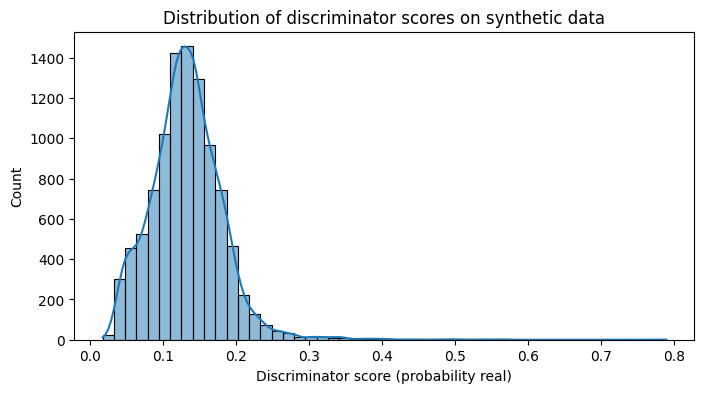

In [43]:
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score

# Test discriminator on synthetic_data (uses existing variables: discriminator, synthetic_data, synthetic_data_scaled, top_features, scaler)
import matplotlib.pyplot as plt

# Use pre-computed scaled array if available, otherwise scale the DataFrame
if 'synthetic_data_scaled' in globals() and synthetic_data_scaled is not None:
    X_syn = synthetic_data_scaled
else:
    X_syn = scaler.transform(synthetic_data[top_features].values)

# Get discriminator scores
scores = discriminator.predict(X_syn).flatten()

# Basic stats
print(f"Num samples: {len(scores)}")
print(f"Score -> mean: {scores.mean():.4f}, std: {scores.std():.4f}, min: {scores.min():.4f}, max: {scores.max():.4f}")
for t in (0.2, 0.5, 0.8):
    print(f"Proportion with score > {t}: {(scores > t).mean()*100:.2f}% ({(scores > t).sum()})")

# If synthetic labels exist, compare
if 'synthetic_data' in globals() and 'label' in synthetic_data.columns:
    df_eval = synthetic_data.copy().reset_index(drop=True)
    df_eval['_score'] = scores
    summary = df_eval.groupby('label')['_score'].agg(['count', 'mean', 'std'])
    print("\nDiscriminator score by assigned synthetic label:")
    print(summary)
    try:
        auc = roc_auc_score(df_eval['label'].values, df_eval['_score'].values)
        print(f"AUC (assigned label vs score): {auc:.4f}")
    except Exception:
        pass

# Show top / bottom examples according to discriminator
top_idx = np.argsort(scores)[-5:][::-1]
bot_idx = np.argsort(scores)[:5]

print("\nTop 5 samples by discriminator score:")
display(df_eval.loc[top_idx].assign(discriminator_score=scores[top_idx]))

print("\nBottom 5 samples by discriminator score:")
display(df_eval.loc[bot_idx].assign(discriminator_score=scores[bot_idx]))

# Plot score distribution
plt.figure(figsize=(8,4))
sns.histplot(scores, bins=50, kde=True)
plt.xlabel('Discriminator score (probability real)')
plt.title('Distribution of discriminator scores on synthetic data')
plt.show()

### Brief summary of results
- Dataset: 175,341 training rows × 45 features. After feature-selection we trained GAN on the top 20 features (input_dim = 20).  
- Label imbalance: label mean ≈ 0.6806 (majority class). GAN was used to synthesize additional samples and force a 50/50 split by ranking generator outputs with the discriminator.  
- Training behaviour: generator loss decreased steadily (example: ≈0.65 → ≈0.45 over training), indicating the generator learned to produce samples that increasingly fooled the discriminator. Discriminator remained able to score samples; grouped means of discriminator scores show higher average score for the half labeled “1” than for the half labeled “0” (summary: label=0 mean≈0.096, label=1 mean≈0.170), consistent with the ranking-based labeling strategy.

### What was achieved with the GAN
- Synthetic dataset: 10,000 synthetic rows generated from the trained generator; synthetic rows were scaled back (inverse transform) and then ranked by discriminator score. Top 50% were labeled as class 1 and bottom 50% as class 0 — producing a balanced synthetic dataset for downstream experiments.
- Distribution checks: KDE plots and visual sample inspection were performed to compare real vs generated feature distributions (these checks help identify which features the generator models well and which it does not).

### Observed issues / artifacts
- Some generated values are unrealistic (large magnitudes, negative values for quantities that should be non‑negative, or extreme values for TCP counters). Causes:
    - Generator outputs continuous values; inverse-scaling can map values outside the realistic domain.
    - Categorical / integer-valued features were treated as continuous during generation.
- These artifacts require post-processing before using synthetic data for model training or production tests.

### Relevance / usefulness of using a GAN here
- Class balancing and augmentation: GAN provides synthetic examples to augment minority/under-represented behavior and to test classifiers under a balanced dataset.  
- Joint-distribution modeling: GANs capture joint feature dependencies (more than independent marginal sampling) which helps create realistic multivariate combinations.  
- Discriminator-as-detector: the discriminator itself can be reused as a pseudo-anomaly detector (it outputs a “realness” score).  
- Controlled labeling: ranking generator outputs by discriminator score lets you create synthetic positive/negative sets without explicit labels from a simulator.

### Recommended next steps
1. Post-process synthetic outputs:
     - Clip numeric features to observed min/max or sensible ranges.
     - Round/convert integer features and map categorical code features back to valid discrete categories.
     - Apply domain constraints (e.g., non-negative rates, consistent port/protocol tuples).
2. Improve generator realism:
     - Use conditional GAN (cGAN) or tabular-focused models (CTGAN, TVAE) to better handle mixed continuous/categorical data.
     - Try stabilizing alternatives (WGAN-GP, gradient penalty, label smoothing).
3. Quantitative validation:
     - Compute distributional metrics (KS-test, Wasserstein distance) per feature.
     - Train a downstream classifier with and without synthetic augmentation and compare metrics (AUC, precision/recall, F1) on a held-out real test set.
4. Evaluate discriminator utility:
     - Treat discriminator scores as anomaly scores and compute ROC/AUC vs true labels.
5. Involve domain experts to validate whether generated combinations are plausible for the network/security context.

Summary: the GAN successfully learned structure in the selected top features and produced synthetic data usable for augmentation and experimentation. Before operational use, apply careful post-processing, stronger tabular GAN approaches, and quantitative validation to remove artifacts and ensure fidelity.